In [6]:
# ---------------------------------------
# 01_data_exploration.ipynb
# Purpose: Explore raw dataset structure and signals
# ---------------------------------------

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat

# Set default plot style
plt.style.use('ggplot')

# Define the path to your raw data
data_dir = '../data/raw/'  # Adjust if your notebook is in a different folder

# List available files
file_list = os.listdir(data_dir)
print(f"Total files found: {len(file_list)}")
print("Sample files:", file_list[:5])


Total files found: 3
Sample files: ['Accelerometer', 'Dynamic Pressure Sensor', 'Hydrophone']


In [8]:
import os

# Define path to raw data folder
base_dir = '../data/raw'
sensor_folders = ['Accelerometer', 'Hydrophone', 'Dynamic Pressure Sensor']

# Loop through each sensor folder and list the files
for sensor in sensor_folders:
    folder_path = os.path.join(base_dir, sensor)
    print(f"\n--- Contents of {sensor} ---")
    
    if os.path.isdir(folder_path):
        files = os.listdir(folder_path)
        print(f"Total files: {len(files)}")
        for f in files[:5]:  # Show first 5 files only
            print(f)
    else:
        print("❌ Folder does not exist:", folder_path)



--- Contents of Accelerometer ---
Total files: 2
Branched
Looped

--- Contents of Hydrophone ---
Total files: 3
Background Noise
Branched
Looped

--- Contents of Dynamic Pressure Sensor ---
Total files: 2
Branched
Looped


In [9]:
import os

# Define the base directory and sensor names
base_dir = '../data/raw'
sensor_folders = ['Accelerometer', 'Hydrophone', 'Dynamic Pressure Sensor']

# Loop through each sensor and check its "Looped" subfolder
for sensor in sensor_folders:
    looped_path = os.path.join(base_dir, sensor, 'Looped')
    print(f"\n--- Contents of {sensor}/Looped ---")

    if os.path.isdir(looped_path):
        files = os.listdir(looped_path)
        print(f"Total files: {len(files)}")
        for f in files[:10]:  # Print first 10 files
            print(f)
    else:
        print("❌ Looped subfolder not found:", looped_path)



--- Contents of Accelerometer/Looped ---
Total files: 5
Circumferential Crack
Gasket Leak
Longitudinal Crack
No-leak
Orifice Leak

--- Contents of Hydrophone/Looped ---
Total files: 5
Circumferential Crack
Gasket Leak
Longitudinal Crack
No-leak
Orifice Leak

--- Contents of Dynamic Pressure Sensor/Looped ---
Total files: 5
Circumferential Crack
Gasket Leak
Longitudinal Crack
No-leak
Orifice Leak


In [10]:
import os

# Pick one sensor to inspect in detail
sensor_path = '../data/raw/Accelerometer/Looped'
leak_types = os.listdir(sensor_path)

for leak in leak_types:
    leak_folder = os.path.join(sensor_path, leak)
    print(f"\n--- {leak} ---")
    files = os.listdir(leak_folder)
    print(f"Total files: {len(files)}")
    for f in files[:5]:  # Print first 5 files for each leak type
        print(f)



--- Circumferential Crack ---
Total files: 8
LO_CC_0.18 LPS_A1.csv
LO_CC_0.18 LPS_A2.csv
LO_CC_0.47 LPS_A1.csv
LO_CC_0.47 LPS_A2.csv
LO_CC_ND_A1.csv

--- Gasket Leak ---
Total files: 8
LO_GL_0.18 LPS_A1.csv
LO_GL_0.18 LPS_A2.csv
LO_GL_0.47 LPS_A1.csv
LO_GL_0.47 LPS_A2.csv
LO_GL_ND_A1.csv

--- Longitudinal Crack ---
Total files: 8
LO_LC_0.18 LPS_A1.csv
LO_LC_0.18 LPS_A2.csv
LO_LC_0.47 LPS_A1.csv
LO_LC_0.47 LPS_A2.csv
LO_LC_ND_A1.csv

--- No-leak ---
Total files: 8
LO_NL_0.18 LPS_A1.csv
LO_NL_0.18 LPS_A2.csv
LO_NL_0.47 LPS_A1.csv
LO_NL_0.47 LPS_A2.csv
LO_NL_ND_A1.csv

--- Orifice Leak ---
Total files: 8
LO_OL_0.18 LPS_A1.csv
LO_OL_0.18 LPS_A2.csv
LO_OL_0.47 LPS_A1.csv
LO_OL_0.47 LPS_A2.csv
LO_OL_ND_A1.csv


Sample data overview:
   Sample     Value               LeakType               FileName
0     0.0  0.000434  Circumferential Crack  LO_CC_0.18 LPS_A1.csv
1     0.0  0.002971  Circumferential Crack  LO_CC_0.18 LPS_A2.csv
2     0.0  0.000448  Circumferential Crack  LO_CC_0.47 LPS_A1.csv
3     0.0 -0.004048  Circumferential Crack  LO_CC_0.47 LPS_A2.csv
4     0.0  0.000096  Circumferential Crack        LO_CC_ND_A1.csv

Columns in sample file: ['Sample', 'Value']


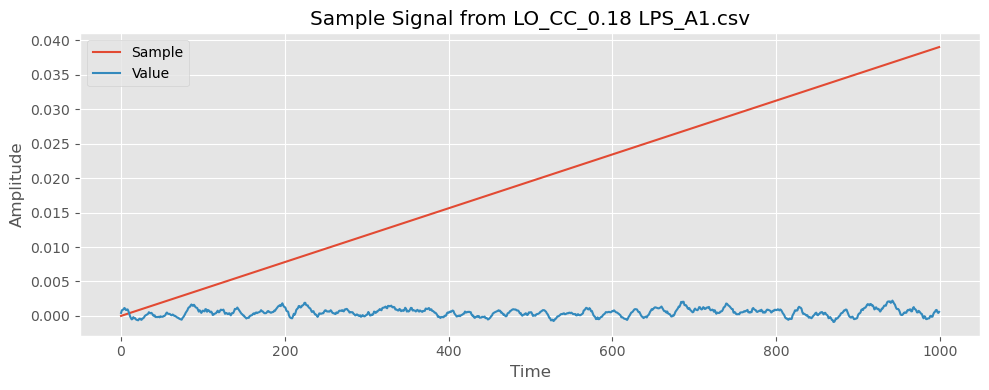

In [11]:
# 01_data_exploration.ipynb

import os
import pandas as pd
import matplotlib.pyplot as plt

# Paths
base_path = '../data/raw/Accelerometer/Looped'
leak_types = os.listdir(base_path)

# Initialize
data_samples = []

# Loop through each leak type folder
for label in leak_types:
    folder_path = os.path.join(base_path, label)
    if not os.path.isdir(folder_path):
        continue
    for filename in os.listdir(folder_path):
        if filename.endswith('.csv'):
            filepath = os.path.join(folder_path, filename)
            try:
                df = pd.read_csv(filepath)
                df['LeakType'] = label
                df['FileName'] = filename
                data_samples.append(df.head(1))  # Just sample for inspection
            except Exception as e:
                print(f"Failed to read {filepath}: {e}")

# Combine a preview
preview_df = pd.concat(data_samples, ignore_index=True)
print("Sample data overview:")
print(preview_df.head())

# Optional: Visualize one sample file
sample_file = os.path.join(base_path, 'Circumferential Crack', 'LO_CC_0.18 LPS_A1.csv')
sample_df = pd.read_csv(sample_file)
print(f"\nColumns in sample file: {sample_df.columns.tolist()}")

# Plot first 1000 points
plt.figure(figsize=(10, 4))
for col in sample_df.columns:
    plt.plot(sample_df[col][:1000], label=col)
plt.title('Sample Signal from LO_CC_0.18 LPS_A1.csv')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.tight_layout()
plt.show()
